In [49]:
import pandas as pd 
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import scipy.sparse
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [50]:

mask = np.array(Image.open('musicnote.jpg'))
wc = WordCloud(stopwords=stop_words,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(''.join(corpus))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'musicnote.jpg'

In [52]:
music_df = pd.read_csv('music_data_cleanded.csv')

In [53]:
artists = ['Al Bowlly','Francisco Canaro', 'Jelly Roll Morton','Marty Murray','Numba 9','Slowburner','Barbara Cook','Louis Armstrong','Paul Whiteman','Carroll Gibbons','Giuseppe Giordani','Steve Correll Group','Duke Ellington',\
          'Jack Payne', 'Joe Quartz', 'Mississippi Sheiks','Raquel Meller','Robert David Hall','Robert Francis',\
         'Rock Projection', 'Shorty Bralik', 'The Executor', 'The New Yorkers','Jack Payne',\
         'Dick Justice','Jeff Beatman','Ninon Vallin','Charpin,Henry Hall','Art Tatum','Roy Fox','SURF',\
        'Bunny Berigan','Jack Jackson & His Orchestra','Jeff Henry','Metronome All Star Band','Nomy,Orchestra'  ,\
          'Django Reinhardt', 'Gion, Jeff Stetson', 'Glenn Miller' , 'Lonnie Johnson', 'Ludwig van Beethoven', \
          'P. Maximilian', 'Richard Wagner', 'Sylvia de Grasse', 'Tommy Dorsey','Charlie Chaplin', 'Count Basie',\
         'Mary Martin', 'Miles Davis', 'Mildred Bailey','Alice Faye',\
          'Big Maceo', 'Hot Lips page', 'Mushy Peas', 'Sonny Davis', 'The 1937 Flood', 'Walter La Ganga', 'Sonny Boy Williamson II',\
           'Dick Haymes', 'The Lion', 'Jesus Sosa', 'Joan Elliso',  'Lead Belly', 'P. Mobil', 'The Cotton Club'\
           'Richard Levitt', 'Malathi', 'The Executor', 'A.J. Croce', 'Ken Elkinson', 'Lena Horne', 'Local Oafs', 'Arthur Treacher', \
          'Asha Bhosle', 'Carlo Buti','Dmitri Shostakovich','Earl Robinson', 'Fred Astaire', 'Jean Sibelius', 'Mina', 'Natalino Otto',\
          'Orchestra Studio 7', 'Rajkumari', 'Alfred Newman', 'Richard Rodgers', '9 Days Wonder', 'Betty Grable','Don Byas','Lester Young',\
           'Memphis Slim', 'Stan Getz', 'Erroll Garner','The Hollywood Four Blazes', 'Buck Clayton', 'Neilson Taylor','Ella Logan',\
         'Joe Mooney', 'Jerry Laws', 'Hubert Fol', 'Merle Travis', 'Lon Hoyt', 'Roy Eldridge', 'Sheela', 'Sonny Terry','The Soft Winds',\
           'Dizzy Gillespie', 'Candy Johnson', 'Johnny Green', 'Charles Mingus', 'George Gershwin', 'John Lewis', 'Kurt Weill', 'Danny Kaye',\
         'Lord Melody','Esquivel!','Johnny Copper', 'Ogden Nash', 'Ouija Macc','Randy Cade','Ted Heath','Ahmad Jamal','Benny Carter',\
           'Bill Clifton','Buddy Weed','Flip Phillips','Josh White','Ken Griffin','Lefty Frizzell']

In [54]:
for artist in artists:
    music_df = music_df[music_df.primary_artist!=artist]

In [55]:
music_df.reset_index(inplace=True,drop=True)

In [56]:
corpus = music_df['lyrics']

In [57]:
lyrics_len_list = []
for line in corpus:
    #print(line.split(" "))
    lyrics_len_list.append(len(line.split(" ")))

In [58]:
import numpy as np
count = 0
for i in lyrics_len_list:
    if i > 900 or i < 50:
        count+=1

In [59]:
count

4708

In [60]:
for ix,line in enumerate(music_df['lyrics']):
    if len(line.split(" ")) > 900 or len(line.split(" ")) < 50 :
          music_df.drop(ix,inplace=True)

In [61]:
genre_list = []
for genre in music_df.genres:
    if 'pop' in str(genre):
        genre_list.append('Pop')
    elif 'r&b' in str(genre):
        genre_list.append('R&B')
    elif 'hip hop' in str(genre):
        genre_list.append('Hip-Hop')
    elif 'country' in str(genre):
        genre_list.append('Country')
    elif 'rock' in str(genre):
        genre_list.append('Rock')
    elif 'indie' in str(genre):
        genre_list.append('Indie')
    elif 'blues' in str(genre):
        genre_list.append('Blues')
    elif 'jazz' in str(genre):
        genre_list.append('Jazz')
    elif 'electronic' in str(genre):
        genre_list.append('Electronic')
    elif 'folk' in str(genre):
        genre_list.append('Folk')
    else:
        genre_list.append(None)

In [62]:
music_df['genre'] = genre_list

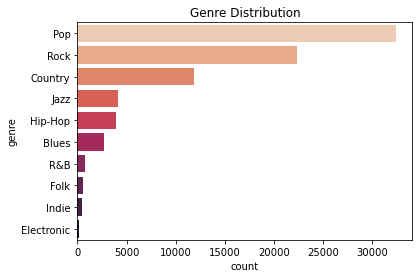

In [63]:
import seaborn as sns
sns.countplot(y='genre', data=music_df ,palette='rocket_r',order = music_df['genre'].value_counts().index)
plt.title('Genre Distribution');

In [64]:
values = music_df['genre'].value_counts()

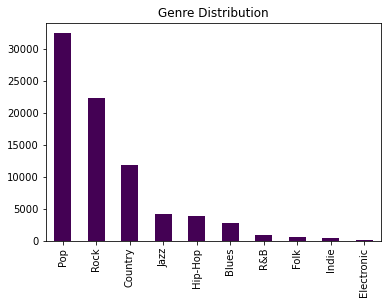

In [65]:
music_df['genre'].value_counts().plot(kind='bar',cmap='viridis')
plt.title('Genre Distribution');

In [50]:
corpus = music_df['lyrics']

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer().fit_transform(corpus)

In [13]:
music_df = music_df.sample(n=30000, random_state=1).reset_index(drop=True)

In [14]:
music_df = music_df.drop(columns=['Unnamed: 0','level_0'])

In [15]:
music_df.to_csv('sample_data2.csv')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TreebankWordTokenizer

class NLPPipe:
   
    def __init__(self, vectorizer=CountVectorizer(), tokenizer=None, cleaning_function=None, 
                 lemmatizer=None,model=None):
        if not tokenizer:
            tokenizer = self.splitter
        if not cleaning_function:
            cleaning_function = self.clean_text
        self.lemmatizer = lemmatizer
        self.tokenizer = tokenizer
        self.model = model
        self.cleaning_function = cleaning_function
        self.vectorizer = vectorizer
        self._is_fit = False
        
    def splitter(self, text):
        return text.split(' ')
        
    
    def fit_transform(self, text):
        clean_text = self.cleaning_function(text, self.tokenizer, self.lemmatizer)
        return self.vectorizer.fit_transform(clean_text)

In [16]:
def clean_text(text, tokenizer, lemmatizer):
    ''' 
    Clean the text with tokenization and lemmatization
    Map popular two name cities into one name with an underscore
    '''
    text=text.str.replace(r'\d+','')
    text=text.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in tokenizer(str(post)):
            low_word = word.lower()
            if lemmatizer:
                low_word = lemmatizer.lemmatize(low_word)
            cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['get','got','this','that'])
stop_words=set(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Sentiment Analysis
* Remove proper nouns

In [66]:
music_df = music_df.sample(n=30000, random_state=1).reset_index(drop=True)

In [67]:
music_df = music_df.drop(columns=['Unnamed: 0','level_0'])

In [ ]:
music_df.iloc[12]

In [72]:
music_df.to_csv('sample_data.csv')

In [73]:
import pandas as pd
music_df = pd.read_csv('sample_data.csv')

In [46]:
corpus = music_df['lyrics']

In [75]:
## Remove proper nouns
nltk.download('averaged_perceptron_tagger')
new_corp = []
for lyric in corpus:
  tagged_lyric = nltk.tag.pos_tag(str(lyric).split())
  edited_lyric = [word for word,tag in tagged_lyric if tag != 'NNP' and tag != 'NNPS']
  new_corp.append(' '.join(edited_lyric))
df = pd.DataFrame(new_corp,columns=['lyrics'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [76]:
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
for lyrics in corpus:
    scores = sid.polarity_scores(lyrics)
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [77]:
music_df['scores'] = compound

In [78]:
music_df['comp_score'] = music_df['scores'].apply(lambda c: 'pos' if c >=0.5  else ('neg' if c <= -0.5  else 'neu'))

In [79]:
genre_list = []
for genre in music_df.genres:
    if 'pop' in str(genre):
        genre_list.append('Pop')
    elif 'r&b' in str(genre):
        genre_list.append('R&B')
    elif 'hip hop' in str(genre):
        genre_list.append('Hip-Hop')
    elif 'country' in str(genre):
        genre_list.append('Country')
    elif 'rock' in str(genre):
        genre_list.append('Rock')
    elif 'indie' in str(genre):
        genre_list.append('Indie')
    elif 'blues' in str(genre):
        genre_list.append('Blues')
    elif 'jazz' in str(genre):
        genre_list.append('Jazz')
    elif 'electronic' in str(genre):
        genre_list.append('Electronic')
    elif 'folk' in str(genre):
        genre_list.append('Folk')
    else:
        genre_list.append(None)

In [80]:
music_df['genre'] = genre_list

In [81]:
sentiment_df = music_df.groupby('genre')['scores'].mean().reset_index()

In [82]:
sentiment_df

,genre,scores
0,Blues,0.535338
1,Country,0.406595
2,Electronic,0.300393
3,Folk,0.371836
4,Hip-Hop,-0.163391
5,Indie,0.248676
6,Jazz,0.607840
7,Pop,0.361086
8,R&B,0.665805
9,Rock,0.273672


In [48]:
corpus[12]

"Will you count me in?  I've been awake for a while now You've got me feeling like a child now 'Cause every time I see your bubbly face I get the tingles in a silly place  It starts in my toes and I crinkle my nose Wherever it goes, I always know That you make me smile, please stay for a while now Just take your time, wherever you go  The rain is falling on my window pane But we are hiding in a safer place Under covers, staying dry and warm You give me feelings that I adore  They start in my toes, make me crinkle my nose Wherever it goes, I always know That you make me smile, please stay for a while now Just take your time, wherever you go  But what am I gonna say When you make me feel this way? I just... Mmm  And it starts in my toes, makes me crinkle my nose Wherever it goes, I always know That you make me smile, please stay for a while now Just take your time, wherever you go  Ta-da-dam, ta-da, da-dam, ta-da-dam, ta-da-da-da, ta-da-dam Um-ba, da-da, um-ba, ta-da-da-da, uhm, mm-mmh  

<AxesSubplot:xlabel='scores', ylabel='genre'>

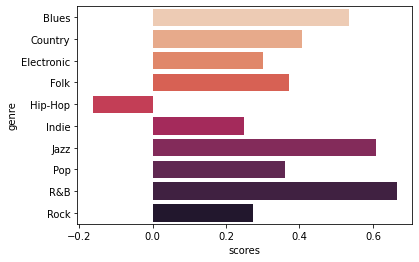

In [88]:
sns.barplot(x="scores", y="genre", data=sentiment_df,palette='rocket_r')

In [71]:
with sns.color_palette("Spectral", n_colors=10):
    
music_df.groupby('genre')['scores'].mean().plot(kind='bar', cmap='hot');

KeyError: 'Column not found: scores'

In [18]:
eng_df = music_df.groupby(['year','genre'])['valence'].mean()

# turn to string
eng_df = eng_df.reset_index()

eng_df

,year,genre,valence
0,1921,Folk,0.406000
1,1921,Pop,0.261450
2,1923,Blues,0.438421
3,1923,Country,0.735000
4,1923,Jazz,0.603500
...,...,...,...
665,2020,Hip-Hop,0.432418
666,2020,Indie,0.232000
667,2020,Pop,0.468195
668,2020,R&B,0.417727


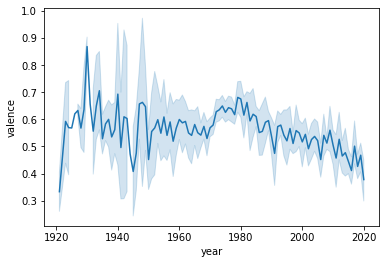

In [27]:
# pass custom palette:
sns.lineplot(data=eng_df,x='year', 
             y='valence');

## Create AVG valence over time 

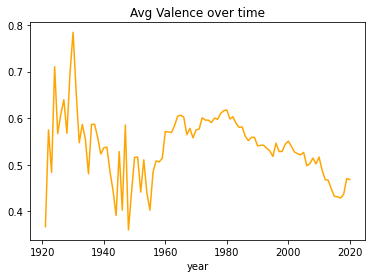

In [26]:
music_df.groupby('year')['valence'].mean().plot(kind='line',color='orange');
plt.title('Avg Valence over time');

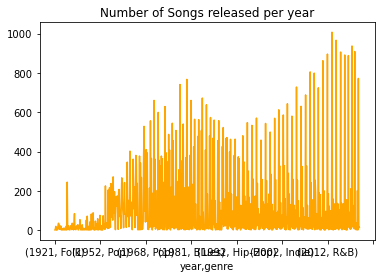

In [16]:
music_df.groupby(['year','genre'])['name'].count().plot(title="Number of Songs released per year", color='orange');

In [24]:
eng_df = music_df.groupby(['year','genre'])['name'].count()

# turn to string
eng_df = eng_df.reset_index()

eng_df

,year,genre,name
0,1921,Folk,1
1,1921,Pop,6
2,1923,Blues,19
3,1923,Country,1
4,1923,Jazz,4
...,...,...,...
665,2020,Hip-Hop,201
666,2020,Indie,1
667,2020,Pop,772
668,2020,R&B,11


In [25]:
eng_df.genre.isin(['Pop','Rock','Jazz'])

0      False
1       True
2      False
3      False
4       True
       ...  
665    False
666    False
667     True
668    False
669     True
Name: genre, Length: 670, dtype: bool

In [26]:
eng_df = eng_df[eng_df.genre.isin(['Pop','Rock','Jazz'])]

Text(0.5, 1.0, 'Number of songs across genre over time')

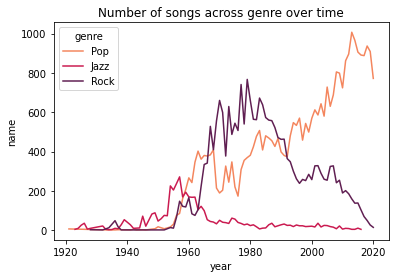

In [28]:
sns.lineplot(data=eng_df,x='year', 
             y='name',hue='genre',palette='rocket_r');
plt.title('Number of songs across genre over time')

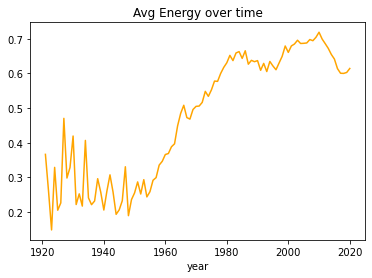

In [69]:
music_df.groupby('year')['energy'].mean().plot(kind='line',color='orange');
plt.title('Avg Energy over time');

In [38]:
 def get_sparse(vector):
    cosine_similarities = cosine_similarity(vector, vector)
    np.percentile(cosine_similarities[:,0],1)

    cos_dist_df = pd.DataFrame(cosine_similarities)
    cos_dist_df[cos_dist_df>1.5] = 0

    # make sparse matrix
    sparse_mat = scipy.sparse.csc_matrix(cos_dist_df)

 
    return sparse_mat

In [105]:
def mood_recommendations(df,valence,energy):
    df = df[df['valence'] >= valence-0.05]
    df = df[df['valence'] <= valence+0.05]
    df = df[df['energy'] >= energy-0.05]
    df = df[df['energy'] <= energy+0.05]
    return df[['primary_artist','name']]

In [106]:
mood_recommendations(music_df,0.7,0.7)

,primary_artist,name
150,100 gecs,money machine
164,10cc,The Wall Street Shuffle
172,11/5,Garcia Vegas
215,2 Chainz,I'm Different
235,2 LIVE CREW,S & M
...,...,...
99265,Weezer,El Scorcho
99287,Weird Al Yankovic,The Brady Bunch
99323,Weird Al Yankovic,I Want a New Duck
99335,Weird Al Yankovic,Stop Draggin' My Car Around


In [107]:
def movie_recommendations(sparse_mat,df,title):
    music = df['name']
    
    indices = pd.Series(df.index, index = df['name'])
    idx = indices[title]

    result = pd.DataFrame(sparse_mat[:,idx].toarray()).sort_values(by=0,ascending=False).head(1000).index
    #music_indices  = [score for score in result if  (valence-0.05)>=df.iloc[score]['valence']<=(valence+0.05) and (energy-0.05)>=df.iloc[score]['energy']<=(energy+0.05)]
   # music_indices  = [score for score in result if  ]
    #movie_indices  = [score for score in result if  df.iloc[score]['comp_score']== sent]
    
    music_indices = result[1:100]

    print(music_indices)
    recommend = music.iloc[music_indices]
    songs = []
    val = []
    artist = []
    songs.append(df.loc[music_indices]['name'].item())
    val.append(df.loc[music_indices]['valence'].item())
    artists.append(df.loc[music_indices]['primary_artist'].item())
    return recommend,pd.DataFrame(list(zip(songs,artist,val)),columns=['Song','Artist','valence']),music_indices,idx

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

class NLPPipe:
   
    def __init__(self, vectorizer= TfidfVectorizer(), tokenizer=None, cleaning_function=None, 
                 lemmatizer=None,model=None):
        if not tokenizer:
            tokenizer = self.splitter
        if not cleaning_function:
            cleaning_function = self.clean_text
        self.lemmatizer = lemmatizer
        self.tokenizer = tokenizer
        self.model = model
        self.cleaning_function = cleaning_function
        self.vectorizer = vectorizer
        self._is_fit = False
        
    def splitter(self, text):
        return text.split(' ')
        
 
    
    def fit_transform(self, text):
        clean_text = self.cleaning_function(text, self.tokenizer, self.lemmatizer)
        return self.vectorizer.fit_transform(clean_text)

In [109]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words = stop_words,max_df=0.5), 
              cleaning_function=clean_text, 
              tokenizer=TreebankWordTokenizer().tokenize,
              lemmatizer = WordNetLemmatizer())

tf_result = nlp.fit_transform(corpus)

In [42]:
cosine_sim = get_sparse(tf_result)

In [49]:
movie_recommendations(cosine_sim,music_df,'Mood (feat. Zacari)')

Int64Index([ 7811, 12907,  9740,   779,  1311, 10709,  9492, 11316,  5557,
            10421, 10674, 12155,  4215,  6463,   385,  1014,  4776, 10184,
              825, 12826,  6258,  9958,  9447, 12850, 13889,  2014,  1555,
            13806, 14935,  2208,  1115,  2685, 12446, 13380,  8507,  9874,
            10227, 11026,  6399,  5468,  2177,  7205, 10081,  1757,  8217,
             1712,  4229,  6714, 14590, 11419,  7036,  8435,  5509, 11941,
             8705,  4760, 10180,  2617,  3125,  4740, 11409, 11378,  4749,
            10404, 12993,  9798,  8651, 14021,  6262,  9151, 11728,  3636,
             4124, 10043,  8698,  8595, 14901,  8239,  8823,  6342, 14732,
            10887, 13629,   414,  5681, 11048,  1166,  4606,  7863,  5987,
             3003,  1041, 14320,  2065, 10526, 11640,  3029,  5901,   571],
           dtype='int64')


ValueError: can only convert an array of size 1 to a Python scalar

In [27]:
music_df.iloc[0]

acousticness                                                   0.0392
artists                                                ['Cody Jinks']
danceability                                                    0.551
duration_ms                                                    234240
energy                                                          0.783
explicit                                                            0
id                                             1hs1EdsJl7WbPflDI37B63
instrumentalness                                              0.00067
key                                                                 2
liveness                                                        0.153
loudness                                                       -5.886
mode                                                                1
name                                                        We Get By
popularity                                                         56
release_date        

In [42]:
music_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,release_date,speechiness,tempo,valence,year,lyrics,primary_artist,genres,scores,comp_score
0,0.03920,['Cody Jinks'],0.551,234240,0.783,0,1hs1EdsJl7WbPflDI37B63,0.000670,2,0.153,...,2012-04-11,0.0368,118.001,0.404,2012,Stayin' burnt out all the time Well that's a g...,Cody Jinks,"['modern southern rock', 'outlaw country', 'te...",0.9788,pos
1,0.03900,"['Heavy D & The Boyz', 'Aaron Hall']",0.744,258200,0.697,0,1KONmY3enP3r3nIPQidWAy,0.000000,8,0.171,...,1991-01-01,0.0631,119.955,0.683,1991,Now that we found love What are we gonna do wi...,Heavy D & The Boyz,"['east coast hip hop', 'electro', 'funk', 'har...",0.9994,pos
2,0.11800,['Lady Gaga'],0.851,237200,0.806,0,5R8dQOPq8haW94K7mgERlO,0.000002,4,0.121,...,2008-01-01,0.0787,118.999,0.787,2008,Mum mum mum mah Mum mum mum mah Mum mum mum ma...,Lady Gaga,"['dance pop', 'pop']",0.9983,pos
3,0.03820,['Taylor Swift'],0.602,327893,0.609,0,1q3RiD1tIWUpGsNFADMlvl,0.000200,0,0.127,...,2012-10-22,0.0243,93.060,0.337,2012,I walked through the door with you The air was...,Taylor Swift,"['dance pop', 'pop', 'post-teen pop']",0.9881,pos
4,0.00604,['Billy Idol'],0.614,297107,0.818,0,76oH4ndG8ZvZ2d8yA9yuuI,0.000008,7,0.377,...,1982-01-01,0.0675,147.463,0.473,1982,"Sun goes down, I rise Red hair flames so brigh...",Billy Idol,"['album rock', 'classic rock', 'dance rock', '...",0.9978,pos


In [71]:
recommend,movie_indices,idx = movie_recommendations(cosine_sim ,music_df,0.7,0.8,'Poker Face')

[16033, 28032, 12756, 14733]


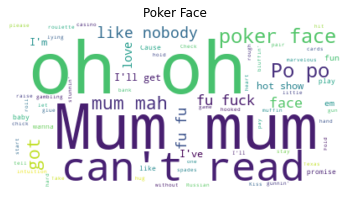

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[idx]['lyrics'])
plt.imshow(wc, interpolation='bilinear')
plt.title(music_df.iloc[idx]['name'].title())
plt.axis("off")
plt.show();

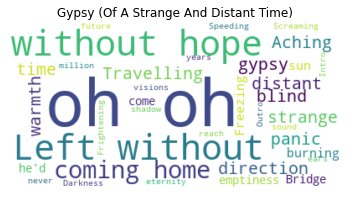

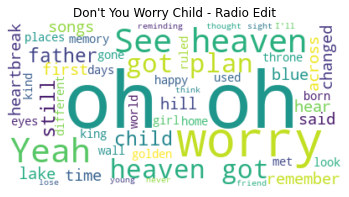

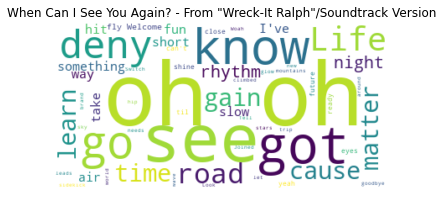

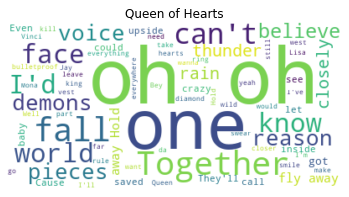

In [60]:
for i in movie_indices:
    wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[i]['lyrics'])
    plt.imshow(wc, interpolation='bilinear')
    plt.title(music_df.iloc[i]['name'])
    plt.axis("off")
    plt.show();

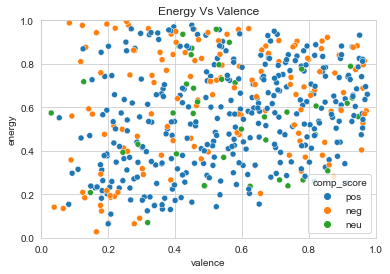

In [102]:
import seaborn as sns
ax = sns.scatterplot(x='valence',y='energy',hue='comp_score',data=music_df.loc[2500:3000]);
# for i in  movie_indices:
#     txt = music_df.iloc[i]['name']
#     ax.annotate(txt, (music_df.iloc[i]['valence'],music_df.iloc[i]['energy']), textcoords='offset points')
plt.xlim(0, 1)
plt.ylim(0, 1)
sns.set_style("whitegrid")
plt.title('Energy Vs Valence');

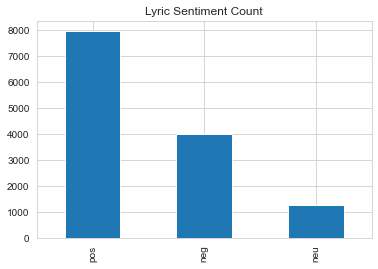

In [101]:
music_df[music_df['valence']<0.5]['comp_score'].value_counts().plot(kind='bar');
plt.title('Lyric Sentiment Count');

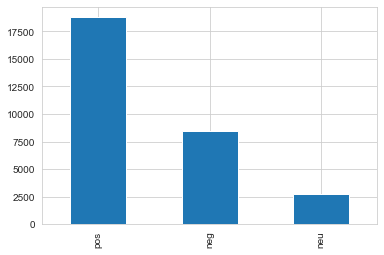

In [100]:
music_df['comp_score'].value_counts().plot(kind='bar');


In [ ]:
music_df.iloc[20909]

In [ ]:
## Delete all music before 1930

## Add new stop words

In [67]:
spanish_stopwords = nltk.corpus.stopwords.words('spanish')
newStopWords = ['want','ha','ca','ago','know','may','would','go'\
               ,'wa','also','old','year','two','one',\
               'time', 'day', 'take', 'people', 'make', 'first', 'come', 'work', 'place', 'night',\
              'scp', 'mr', 'king', 'scp mr', 'dr','mme','oh']
stopwords.extend(spanish_stopwords)
stopwords.extend(newStopWords)
stop_words = stopwords

In [68]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words = stop_words,max_df=0.5), 
              cleaning_function=clean_text, 
              tokenizer=TreebankWordTokenizer().tokenize,
              lemmatizer = WordNetLemmatizer())

tf_result = nlp.fit_transform(corpus)

In [69]:
cosine_sim = get_sparse(tf_result)

In [70]:
recommend,movie_indices,idx = movie_recommendations(cosine_sim ,music_df,0.7,0.8,'Poker Face')

[16033, 28032, 12756, 14733]


In [72]:
recommend

16033                       Sea And Sand
28032         Like China - 2016 Remaster
12756    Brighton Rock - Remastered 2011
14733        Blue Letter - 2017 Remaster
Name: name, dtype: object

In [83]:
music_df['primary_artist'].iloc[16033]

'The Who'

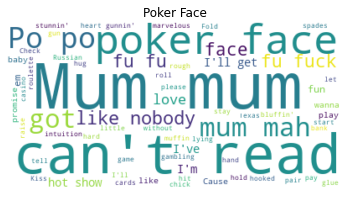

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[idx]['lyrics'])
plt.imshow(wc, interpolation='bilinear')
plt.title(music_df.iloc[idx]['name'].title())
plt.axis("off")
plt.show();

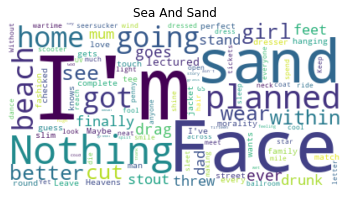

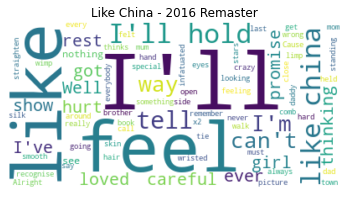

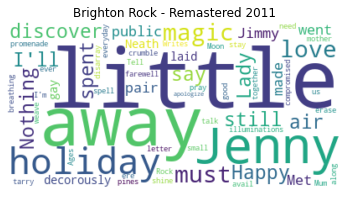

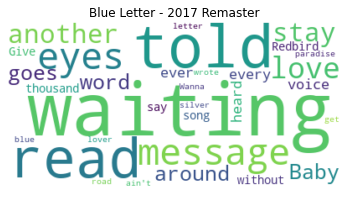

In [74]:
for i in movie_indices:
    wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[i]['lyrics'])
    plt.imshow(wc, interpolation='bilinear')
    plt.title(music_df.iloc[i]['name'])
    plt.axis("off")
    plt.show();

## Add new stopword and an n-gram range

In [56]:
spanish_stopwords = nltk.corpus.stopwords.words('spanish')
newStopWords = ["i'm","i'll",'like',"can't"]

stopwords.extend(newStopWords)
stop_words = stopwords

In [57]:
nlp = NLPPipe(vectorizer=TfidfVectorizer(stop_words = stop_words,max_df=0.5,ngram_range=(1,2)), 
              cleaning_function=clean_text, 
              tokenizer=TreebankWordTokenizer().tokenize,
              lemmatizer = WordNetLemmatizer())

tf_result = nlp.fit_transform(corpus)

In [58]:
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
for i in movie_indices:
    
    num_total = negative[i] + neutral[i] + positive[i]
    percent_negative = (negative[i]/float(num_total))*100
    percent_neutral = (neutral[i]/float(num_total))*100
    percent_positive = (positive[i]/float(num_total))*100
    df.loc[i] = (music_df['name'].iloc[i], percent_positive, percent_neutral, percent_negative)   
df.plot.bar(x='artist', stacked=True)
plt.title('Recommended Songs with a valence and Energy above 0.5')
plt.show()   


NameError: name 'movie_indices' is not defined

In [ ]:
music_df['name'].head()

In [ ]:
cosine_sim = get_sparse(tf_result)

In [167]:
recommend,movie_indices,idx = movie_recommendations(cosine_sim,'All Too Well')

[28830, 26435, 10285, 6140, 24470]


In [ ]:
music_df,0.7,0.7,

In [168]:
recommend

28830                Remember
26435        Chelsea Hotel #2
10285               Long Gone
6140     Affair on 8th Avenue
24470          Long Time Gone
Name: name, dtype: object

In [139]:
music_df.iloc[26435]

acousticness                                                    0.899
artists                                             ['Leonard Cohen']
danceability                                                    0.521
duration_ms                                                    186013
energy                                                         0.0592
explicit                                                            0
id                                             4krhCfJg0znykZoyjeMXRe
instrumentalness                                               0.0639
key                                                                 5
liveness                                                        0.105
loudness                                                      -20.178
mode                                                                1
name                                                 Chelsea Hotel #2
popularity                                                         54
release_date        

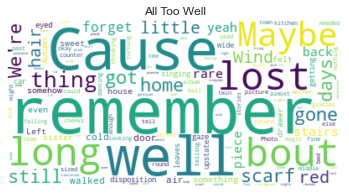

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[idx]['lyrics'])
plt.imshow(wc, interpolation='bilinear')
plt.title(music_df.iloc[idx]['name'].title())
plt.axis("off")
plt.show();

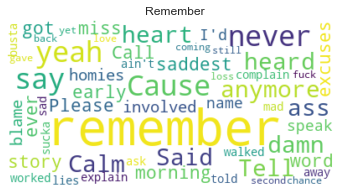

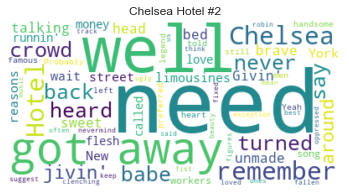

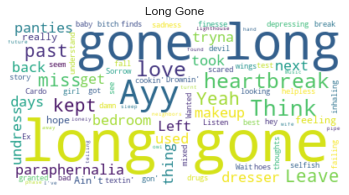

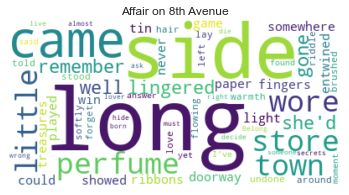

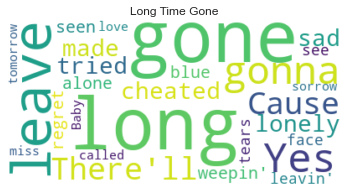

In [171]:
for i in movie_indices:
    wc = WordCloud(stopwords=stop_words,background_color='white').generate(music_df.iloc[i]['lyrics'])
    plt.imshow(wc, interpolation='bilinear')
    plt.title(music_df.iloc[i]['name'])
    plt.axis("off")
    plt.show();

In [186]:
recommend,movie_indices,idx = movie_recommendations(cosine_sim ,music_df,0.5,0.5,'Poker Face')

[11423, 16049, 28743, 2473, 13736]


In [177]:
cosine_sim.shape

(30000, 30000)

In [161]:
[x for a in range(0,1,0.1) if 
    

SyntaxError: unexpected EOF while parsing (<ipython-input-161-84f0dd8fd25d>, line 2)

In [165]:
music_df.iloc[26292]

acousticness                                                    0.964
artists                                               ['Dean Martin']
danceability                                                    0.385
duration_ms                                                    184493
energy                                                         0.0494
explicit                                                            0
id                                             7c7GKbbJNLlCywRkMq4fYp
instrumentalness                                             7.59e-06
key                                                                 2
liveness                                                       0.0939
loudness                                                      -19.222
mode                                                                1
name                                            I Know I Can't Forget
popularity                                                          6
release_date        

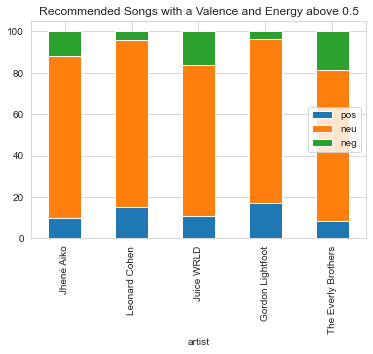

In [172]:
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
for i in movie_indices:
    
    num_total = negative[i] + neutral[i] + positive[i]
    percent_negative = (negative[i]/float(num_total))*100
    percent_neutral = (neutral[i]/float(num_total))*100
    percent_positive = (positive[i]/float(num_total))*100
    df.loc[i] = (music_df['primary_artist'].iloc[i], percent_positive, percent_neutral, percent_negative)   
df.plot.bar(x='artist', stacked=True)
plt.title('Recommended Songs with a Valence and Energy above 0.5')
plt.show() 

In [174]:
import pickle
pickle.dump(cosine_sim, open("sparse.pkl", 'wb'))

In [175]:
music_df.to_pickle('music_df.pkl')

In [178]:
music_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,release_date,speechiness,tempo,valence,year,lyrics,primary_artist,genres,scores,comp_score
0,0.03920,['Cody Jinks'],0.551,234240,0.7830,0,1hs1EdsJl7WbPflDI37B63,0.000670,2,0.1530,...,2012-04-11,0.0368,118.001,0.4040,2012,Stayin' burnt out all the time Well that's a g...,Cody Jinks,"['modern southern rock', 'outlaw country', 'te...",0.9788,pos
1,0.03900,"['Heavy D & The Boyz', 'Aaron Hall']",0.744,258200,0.6970,0,1KONmY3enP3r3nIPQidWAy,0.000000,8,0.1710,...,1991-01-01,0.0631,119.955,0.6830,1991,Now that we found love What are we gonna do wi...,Heavy D & The Boyz,"['east coast hip hop', 'electro', 'funk', 'har...",0.9994,pos
2,0.11800,['Lady Gaga'],0.851,237200,0.8060,0,5R8dQOPq8haW94K7mgERlO,0.000002,4,0.1210,...,2008-01-01,0.0787,118.999,0.7870,2008,Mum mum mum mah Mum mum mum mah Mum mum mum ma...,Lady Gaga,"['dance pop', 'pop']",0.9983,pos
3,0.03820,['Taylor Swift'],0.602,327893,0.6090,0,1q3RiD1tIWUpGsNFADMlvl,0.000200,0,0.1270,...,2012-10-22,0.0243,93.060,0.3370,2012,I walked through the door with you The air was...,Taylor Swift,"['dance pop', 'pop', 'post-teen pop']",0.9881,pos
4,0.00604,['Billy Idol'],0.614,297107,0.8180,0,76oH4ndG8ZvZ2d8yA9yuuI,0.000008,7,0.3770,...,1982-01-01,0.0675,147.463,0.4730,1982,"Sun goes down, I rise Red hair flames so brigh...",Billy Idol,"['album rock', 'classic rock', 'dance rock', '...",0.9978,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.89800,['Cooper Sams'],0.142,255181,0.0263,0,2YmHA1zfrkam6TaO5mkQgZ,0.912000,5,0.0911,...,2019-09-13,0.0376,90.553,0.0382,2019,ACT ONEFADE IN: 1. EXT. GREAT NORTHERN HOTEL -...,Cooper Sams,"['background music', 'focus']",0.9990,pos
29996,0.72100,['Mahalia Jackson'],0.402,167398,0.3450,0,5pTwWOOMfTOU2FOw89U5ua,0.000000,0,0.3540,...,1956,0.0321,78.603,0.6430,1956,"We shall overcome, we shall overcome We shall ...",Mahalia Jackson,"['gospel', 'spirituals']",0.9958,pos
29997,0.81200,['Rodney Dangerfield'],0.498,1171360,0.7360,1,4pX7shPLZKt6MEfbk8Vfk4,0.000000,5,0.5650,...,1980-01-01,0.9500,83.932,0.2420,1980,I tell ya I'm alright now But last week I was ...,Rodney Dangerfield,"['comedy', 'comic']",0.9781,pos
29998,0.23500,['The Beach Boys'],0.593,163427,0.5540,0,0YlN6NlMuSE1iEdDH0vwui,0.927000,0,0.5490,...,1970-08-31,0.0293,115.852,0.8240,1970,"I just met a woman on my way home, she just bl...",The Beach Boys,"['baroque pop', 'brill building pop', 'classic...",0.9855,pos


In [ ]:
18041, 12774

In [188]:
music_df.loc[movie_indices]['name']

11423         With God On Our Side
16049                I'm Wanderin'
28743    If You Could Read My Mind
2473                 All The Faces
13736                      Just Me
Name: name, dtype: object

In [190]:
music_df.loc[movie_indices]['primary_artist']

11423    The Neville Brothers
16049         John Lee Hooker
28743        Gordon Lightfoot
2473            Creed Bratton
13736              Sam & Dave
Name: primary_artist, dtype: object